In [167]:
from FuselageDesign.ShapeFunction import *
from FuselageDesign.ToolKits import *
import FuselageDesign as fd 
#from numpy import logspace,pi,cos 
import numpy as np
import matplotlib.pyplot as plt 

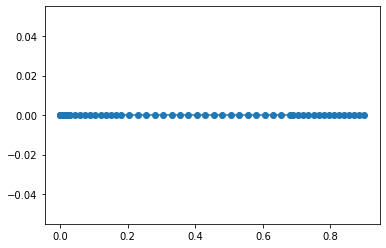

In [168]:

x = np.linspace(0,0.009,13)
x0 = np.linspace(0.01,0.03,8)
x1 = np.linspace(0.03,0.18,11)
x2 = np.linspace(0.18,0.68,21)
x3 = np.linspace(0.69,0.9,15)
nx=[]
nx=np.append(nx,x)
nx=np.append(nx,x0)
nx=np.append(nx,x1[1:])
nx=np.append(nx,x2[1:])
nx=np.append(nx,x3)
nx
plt.plot(nx,zeros(nx.shape),'o-')

In [169]:
nx

array([0.00000000e+00, 7.50000000e-04, 1.50000000e-03, 2.25000000e-03,
       3.00000000e-03, 3.75000000e-03, 4.50000000e-03, 5.25000000e-03,
       6.00000000e-03, 6.75000000e-03, 7.50000000e-03, 8.25000000e-03,
       9.00000000e-03, 1.00000000e-02, 1.28571429e-02, 1.57142857e-02,
       1.85714286e-02, 2.14285714e-02, 2.42857143e-02, 2.71428571e-02,
       3.00000000e-02, 4.50000000e-02, 6.00000000e-02, 7.50000000e-02,
       9.00000000e-02, 1.05000000e-01, 1.20000000e-01, 1.35000000e-01,
       1.50000000e-01, 1.65000000e-01, 1.80000000e-01, 2.05000000e-01,
       2.30000000e-01, 2.55000000e-01, 2.80000000e-01, 3.05000000e-01,
       3.30000000e-01, 3.55000000e-01, 3.80000000e-01, 4.05000000e-01,
       4.30000000e-01, 4.55000000e-01, 4.80000000e-01, 5.05000000e-01,
       5.30000000e-01, 5.55000000e-01, 5.80000000e-01, 6.05000000e-01,
       6.30000000e-01, 6.55000000e-01, 6.80000000e-01, 6.90000000e-01,
       7.05000000e-01, 7.20000000e-01, 7.35000000e-01, 7.50000000e-01,
      

### 根据NACA翼型厚度获得宽度曲线

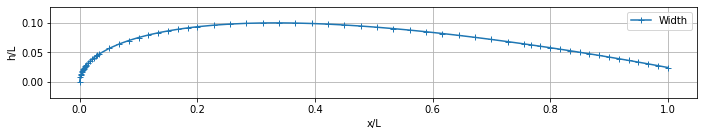

In [170]:
plt.figure(figsize=[10,2])
x,y=naca4(nx,20)
plt.plot(x/0.9,y,"+-",label="Width")
plt.grid()
plt.axis("equal")
plt.xlabel('x/L')
plt.ylabel('h/L')
plt.legend()
plt.tight_layout()
bb=y

### 根据翼型获得高度曲线

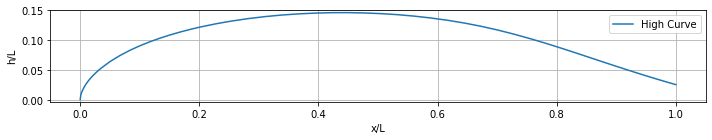

In [171]:
plt.figure(figsize=[10,2])
x,y=getthickness(nx,fn=".\\FuselageDesign\e585.dat")
plt.plot(x/0.9,y,label="High Curve")
plt.axis("equal")
plt.grid()
plt.xlabel('x/L')
plt.ylabel('h/L')
plt.legend()
plt.tight_layout()
aa=y


In [172]:
## 根据B样条曲线确定nn参数  两组参数

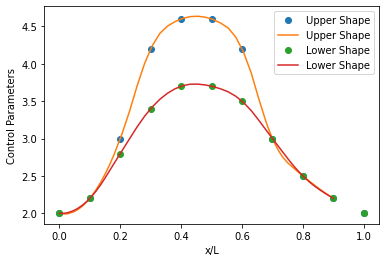

In [173]:
x=np.linspace(0,1,11)
y1=np.array([2,2.2,3.,4.2,4.6,4.6,4.2,3,2.5,2.2,2])
y2=np.array([2,2.2,2.8,3.4,3.7,3.7,3.5,3,2.5,2.2,2])
from scipy.interpolate import splev, splrep
s1=splrep(x,y1,k=2)
ny1=splev(nx,s1)
plt.plot(x,y1,"o",nx,ny1,label="Upper Shape")
s2=splrep(x,y2,k=2)
ny2=splev(nx,s2)
plt.plot(x,y2,"o",nx,ny2,label="Lower Shape")
plt.legend()
plt.xlabel("x/L")
plt.ylabel("Control Parameters")
nn4=np.array([ny2/2+1,ny1,ny1,ny2])
nn4=nn4.T

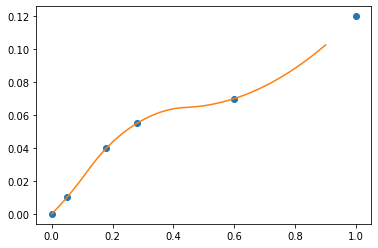

In [174]:
#自制Y曲线

x1=np.array([0, 0.05,  0.18, 0.28, 0.6,1])
y1=np.array([0, 0.01, 0.04, 0.055, 0.07,0.12])

from scipy.interpolate import splev, splrep
s1=splrep(x1,y1,k=2)
ny1=splev(nx,s1)
plt.plot(x1,y1,"o",nx,ny1)
delta = ny1

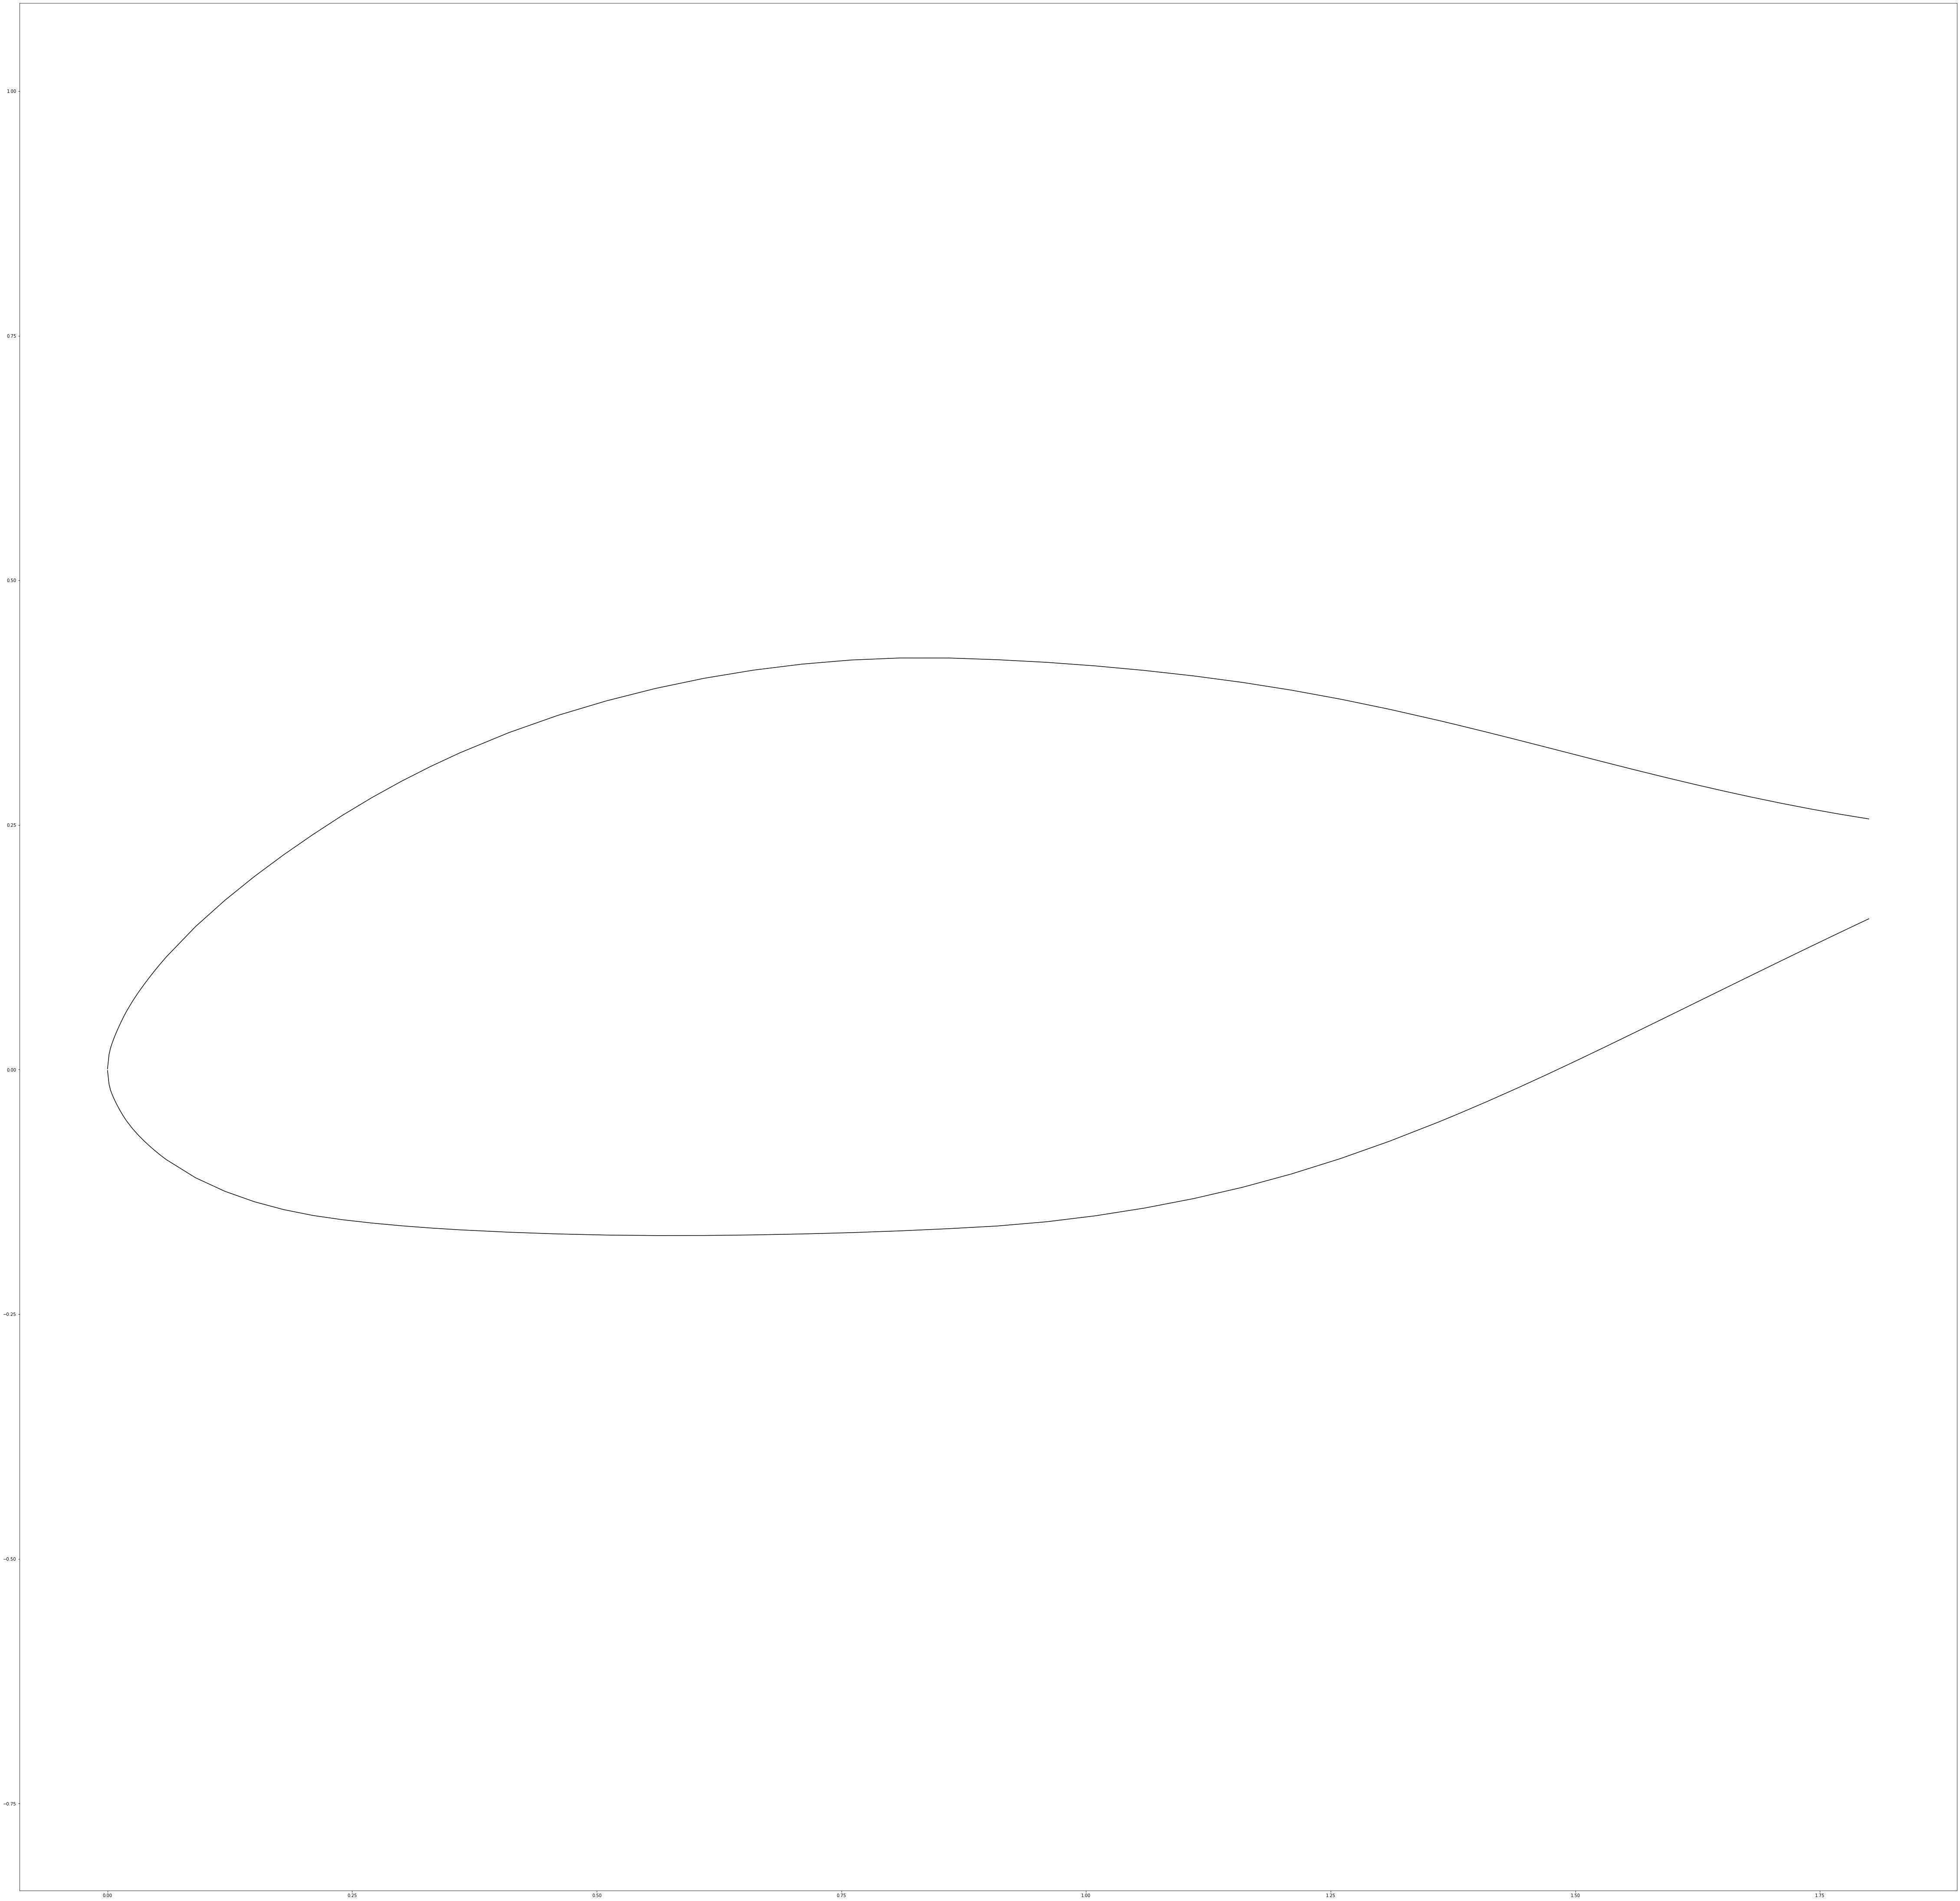

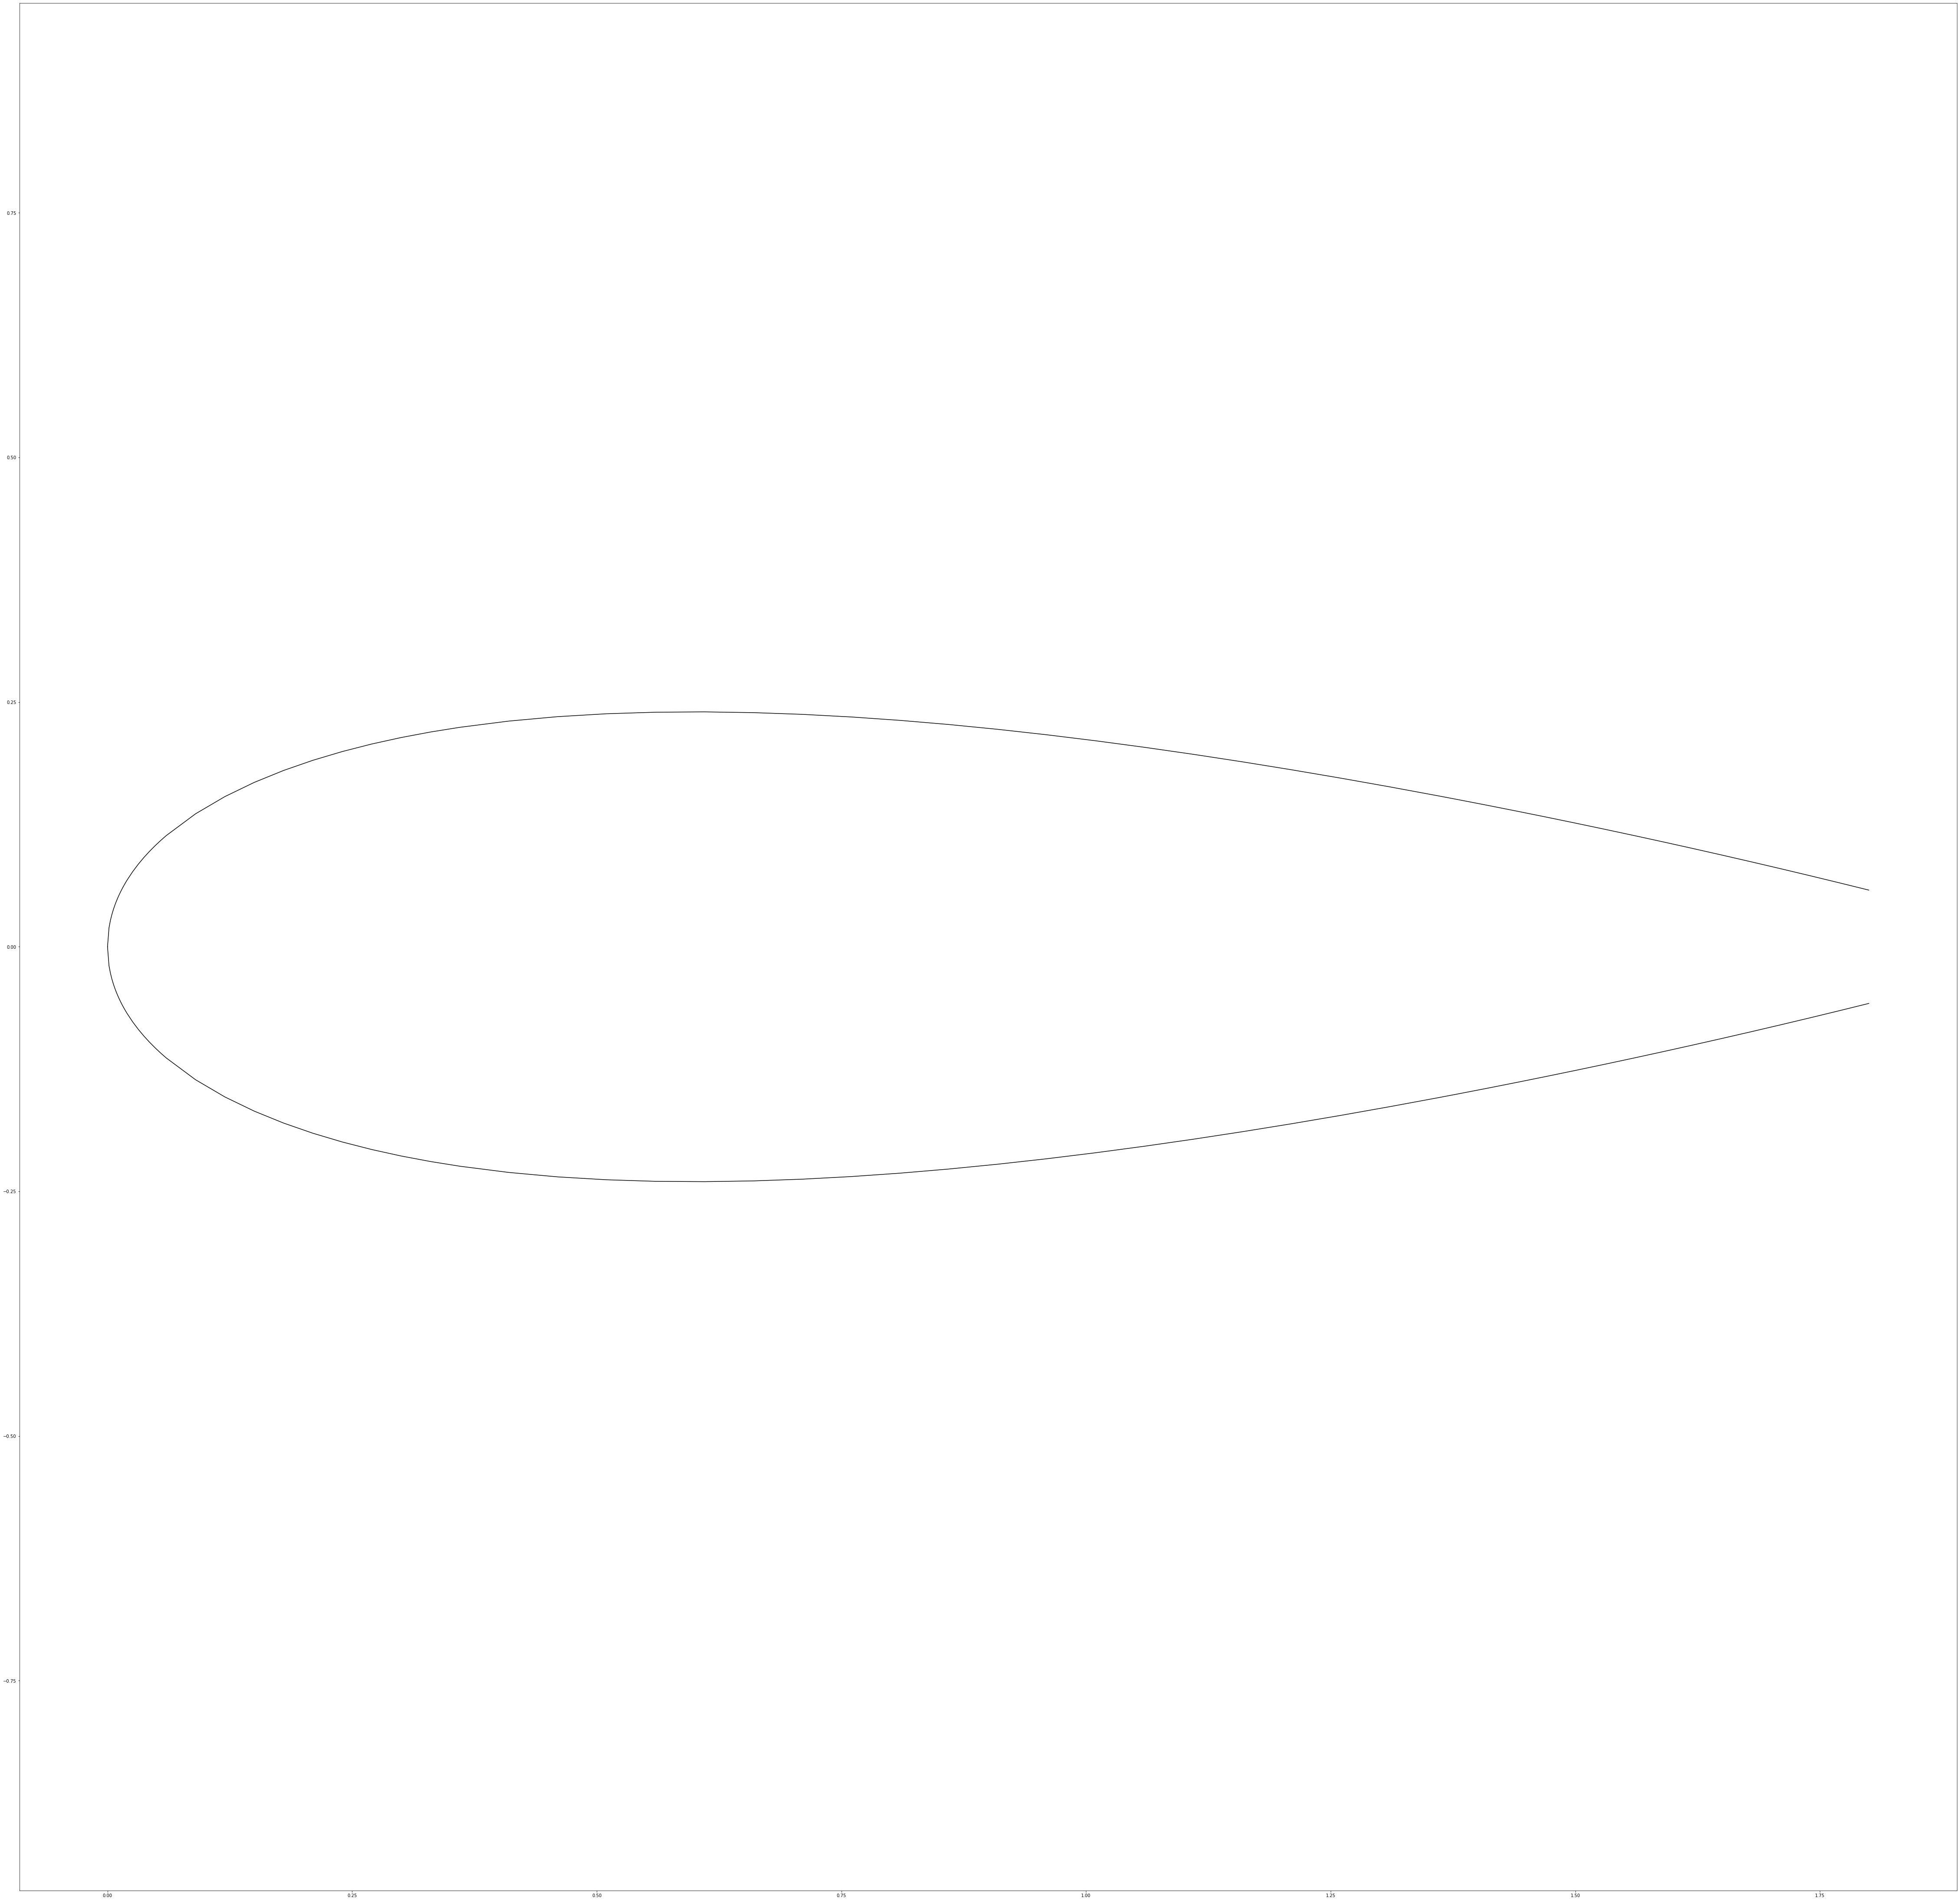

In [175]:
#显示测轮廓
of = open("E:\TestFuselageData-2.txt",'w')
psi = np.linspace(0,2*pi,81)
ymax=[]
ymin=[]
zmax=[]
zmin=[]
q=2
nx*=q
for idx, i in enumerate(nx):
    #print(nn4[idx])
    y,z=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    y+=delta[idx]
    y*=q
    z*=q
    ymax.append(y.max())
    ymin.append(y.min())
    zmax.append(z.max())
    zmin.append(z.min())
    plt.figure(figsize=(30,30))  #单位为英寸
    plt.plot(z,y,color='black')
    lables=['gao   = '  + str(ymax[idx]-ymin[idx])+'\n'+ 'kuan = ' + str(zmax[idx]-zmin[idx])]
    plt.legend(lables,fontsize='xx-large',loc= 'upper left')
    plt.axis("equal")
    plt.savefig('SVG2\%s.svg' % idx,format='svg')
    plt.close()
    for jdx, j in enumerate(z):
        of.write("%f %f %f\n"%(i,y[jdx],z[jdx]))
    of.write("\n")
of.close()
plt.figure(figsize=(80,80))
plt.plot(nx,ymax,color='black')
plt.plot(nx,ymin,color='black')
plt.axis("equal")
plt.savefig('Side-view2.svg',format='svg')
plt.figure(figsize=(80,80))
plt.plot(nx,zmax,color='black')
plt.plot(nx,zmin,color='black')
plt.axis("equal")
plt.savefig('Top-view2.svg',format='svg')



In [164]:
nx

array([0.00000000e+00, 1.50000000e-03, 3.00000000e-03, 4.50000000e-03,
       6.00000000e-03, 7.50000000e-03, 9.00000000e-03, 1.05000000e-02,
       1.20000000e-02, 1.35000000e-02, 1.50000000e-02, 1.65000000e-02,
       1.80000000e-02, 2.00000000e-02, 2.57142857e-02, 3.14285714e-02,
       3.71428571e-02, 4.28571429e-02, 4.85714286e-02, 5.42857143e-02,
       6.00000000e-02, 9.00000000e-02, 1.20000000e-01, 1.50000000e-01,
       1.80000000e-01, 2.10000000e-01, 2.40000000e-01, 2.70000000e-01,
       3.00000000e-01, 3.30000000e-01, 3.60000000e-01, 4.10000000e-01,
       4.60000000e-01, 5.10000000e-01, 5.60000000e-01, 6.10000000e-01,
       6.60000000e-01, 7.10000000e-01, 7.60000000e-01, 8.10000000e-01,
       8.60000000e-01, 9.10000000e-01, 9.60000000e-01, 1.01000000e+00,
       1.06000000e+00, 1.11000000e+00, 1.16000000e+00, 1.21000000e+00,
       1.26000000e+00, 1.31000000e+00, 1.36000000e+00, 1.38000000e+00,
       1.41000000e+00, 1.44000000e+00, 1.47000000e+00, 1.50000000e+00,
      

In [165]:
len(nx)

66

In [166]:
ymax

[0.000807157050836226,
 0.015120084767989582,
 0.021869859191930012,
 0.02644453645915967,
 0.030582003073888454,
 0.03440888079211021,
 0.037998148274199006,
 0.041431855822813814,
 0.04474505863602463,
 0.04795942087767773,
 0.05108101789972929,
 0.05408659433850025,
 0.05696700933388497,
 0.06062569276741055,
 0.07016462227986953,
 0.07877031980180207,
 0.08676769351294263,
 0.09433727351551169,
 0.10156959926657552,
 0.10849901696723213,
 0.11514598798944806,
 0.14624603646312398,
 0.17310847883166997,
 0.19732599749171859,
 0.21956591221779104,
 0.24030519883026585,
 0.25985152899064257,
 0.2779191206468249,
 0.2945127717015335,
 0.30974889240105286,
 0.32371399760070796,
 0.34435753689108506,
 0.3619576395130738,
 0.37691366024321227,
 0.3895604255771665,
 0.39999081367244277,
 0.40825116629505853,
 0.41443379892517407,
 0.4186260545621619,
 0.4206951373851161,
 0.4206557377924329,
 0.4189032856146009,
 0.41622653138327237,
 0.4125502662827645,
 0.40793195446525105,
 0.4023714301